# Introduction to Regression with Neural Networks in Tensorflow

In [1]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating data to view and fit

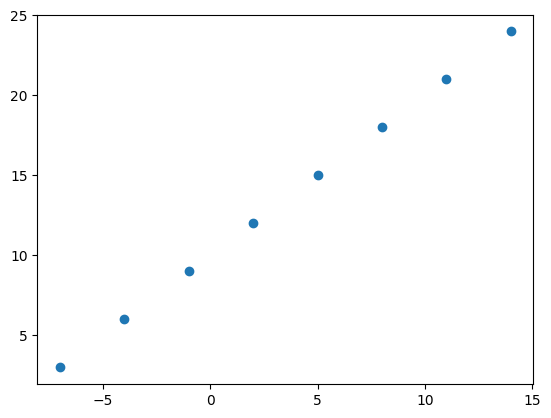

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [ ]:
#Create a demo tensor for our house price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turn our Numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

# Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function
3. **Fitting a model** - letting the model try to find patterns between X and Y

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#sgd is short for stochastic gradient descent)
              metrics = ["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 777ms/step - loss: 14.9408 - mae: 14.9408
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 14.8083 - mae: 14.8083
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 14.6758 - mae: 14.6758
Epoch 4/5
1/1 [==============================] - 0s 23ms/step - loss: 14.5433 - mae: 14.5433
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 14.4108 - mae: 14.4108


In [ ]:
#Check out x and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y = model.predict([17.0])

1/1 [==============================] - 0s 282ms/step


In [ ]:
y + 16

array([[12.026659]], dtype=float32)

# Improving a model

In [ ]:
#Lets rebuild our  model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

ValueError: ignored

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 array([[-3.9733412]], dtype=float32))

In [ ]:
model.predict([17.0])

ValueError: ignored

In [ ]:
#Lets rebuild our  model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

ValueError: ignored

In [ ]:
model.predict([17.0])

ValueError: ignored

In [ ]:
#Lets rebuild our  model

#1. Create the model  with anextra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

ValueError: ignored

In [ ]:
model.predict([17.0])

ValueError: ignored

# Evaluating a model

In [3]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

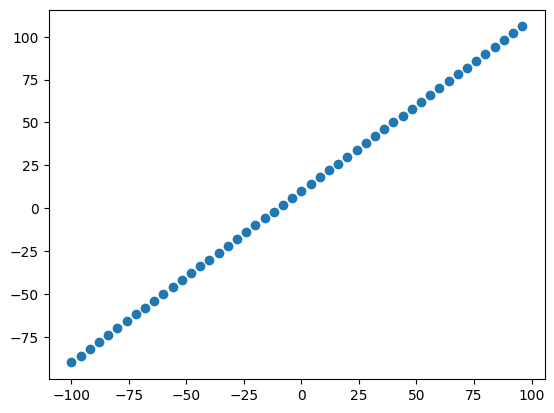

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [ ]:
#Check the length of how many samples we have
len(X)

50

In [5]:
#Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

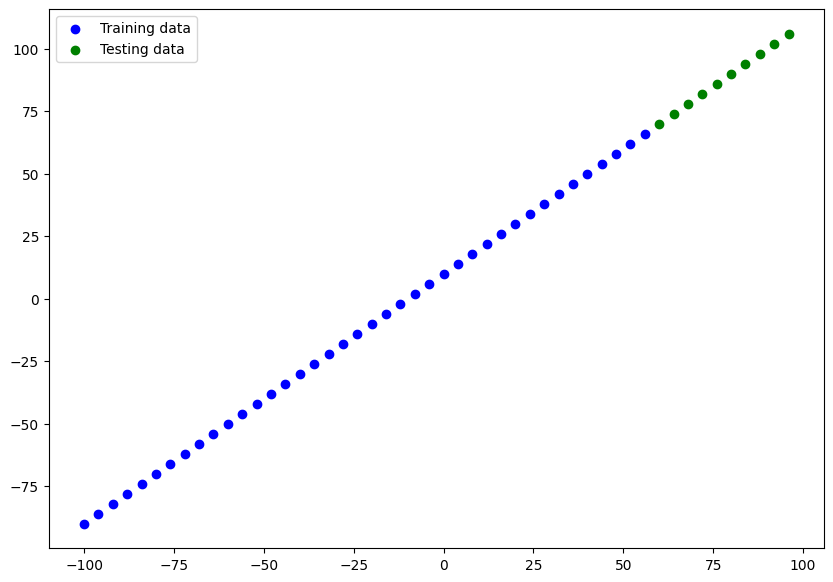

In [ ]:
plt.figure(figsize=(10,7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")
plt.legend()

In [ ]:
#Lets have a look on how to build a neural network for our data
 #1. Create a model

model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
 ])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit the model
#model.fit(X_train, y_train, epochs =100)

In [ ]:
tf.random.set_seed(42)

#Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name= "input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
], name = "model_1")

#2 Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total params - total number of parameters in the model
Trainable params - these are the parameters (patterns) the model can update as it trains.
Non-trainable - these parameters arent updated during training (transfer learning)

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y_train, epochs=100, verbose = 0)

ValueError: ignored

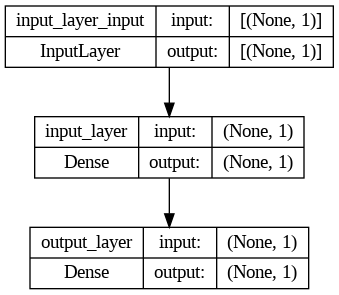

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

# Visualizing model predictions

In [10]:
y_pred = model.predict(X_test)
y_pred

NameError: ignored

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [9]:
def plot_predictions(train_data = X_train, train_labels=y_train, test_data = X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label = "Predictions")
  plt.legend()

NameError: ignored

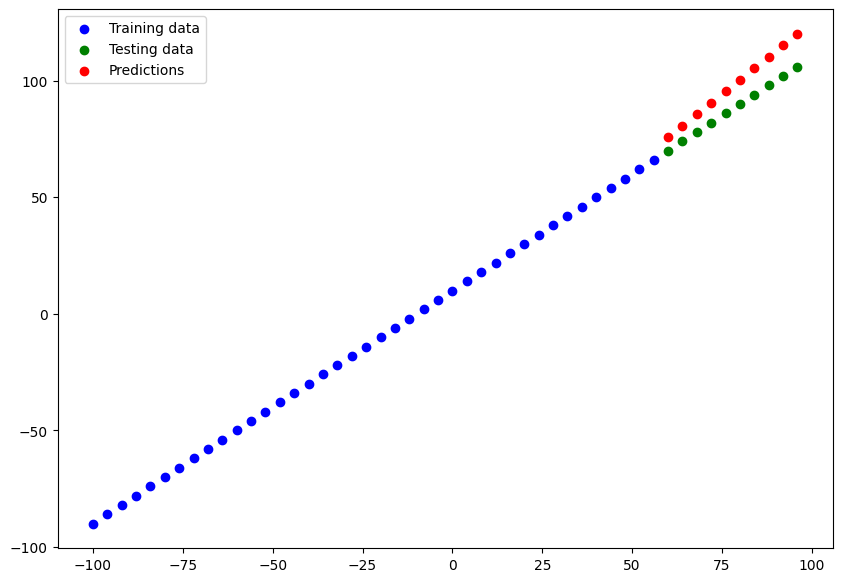

In [ ]:
plot_predictions()

# Evaluating our models prediction with regression evaluation metrics

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 377ms/step - loss: 104.6947 - mae: 104.6947


[104.69474029541016, 104.69474029541016]

In [ ]:
#Calculate the mean absolute error
loss = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=104.69474>

In [ ]:
#Calculate the mean square error
loss = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=11155.541>

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

# Build Model 1

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile
model_1.compile(loss= tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 39ms/step - loss: 30.9926 - mae: 30.9926
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 9.9805 - mae: 9.9805
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 10.4913 - mae: 10.4913
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 9.6614 - mae: 9.6614
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 10.5867 - mae: 10.5867
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 9.7978 - mae: 9.7978
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 8.8766 - mae: 8.8766
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 9.0629 - mae: 9.0629
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 19.5322 - mae: 19.5322
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 10.5431 - mae: 10.5431
Epoch 11/100
2/2 [==============================] - 0s 14ms

1/1 [==============================] - 0s 32ms/step


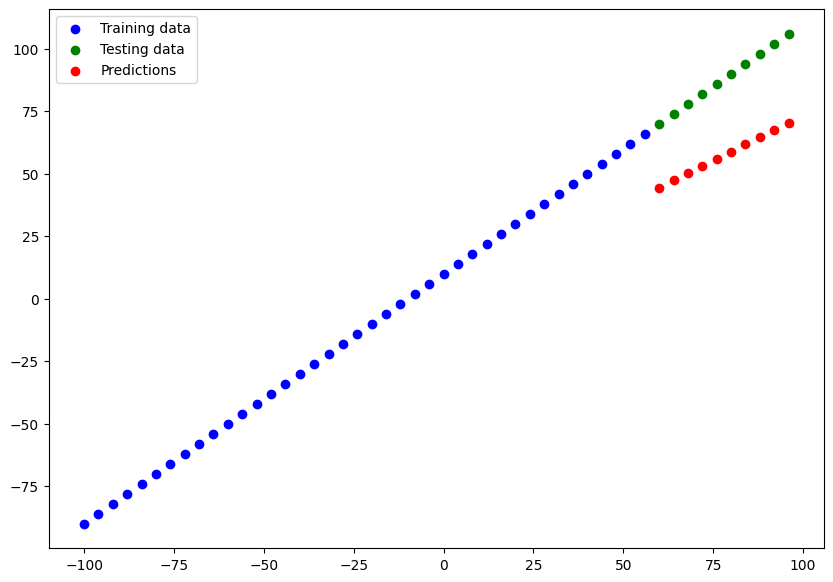

In [ ]:
#Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

In [ ]:
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.55553>,
 <tf.Tensor: shape=(), dtype=float32, numpy=944.02185>)

# Build Model 2

In [6]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 36.0819 - mse: 1854.3395
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 28.6664 - mse: 1067.6976
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 32.4777 - mse: 1617.9109
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0573 - mse: 270.7419
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.3785 - mse: 511.6219
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6476 - mse: 124.2381
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.6648 - mse: 143.7289
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.0207 - mse: 234.4195
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 34.4085 - mse: 1781.0726
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 23.8175 - mse: 793.9262
Epoch 11/100
2/2 [===========================

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [7]:
#Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 80ms/step


array([[ 90.86302 ],
       [ 96.79773 ],
       [102.732445],
       [108.66717 ],
       [114.60188 ],
       [120.5366  ],
       [126.471306],
       [132.40602 ],
       [138.34073 ],
       [144.27545 ]], dtype=float32)

In [8]:
plot_predictions(predictions=y_preds_2)

NameError: ignored

In [ ]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.477764>,
 <tf.Tensor: shape=(), dtype=float32, numpy=899.6998>)

# Build Model 3

In [2]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

NameError: ignored

In [ ]:
#Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
y_preds_3

1/1 [==============================] - 0s 65ms/step


array([[16.634705],
       [17.439705],
       [18.244705],
       [19.049706],
       [19.854706],
       [20.659706],
       [21.464708],
       [22.269709],
       [23.07471 ],
       [23.879711]], dtype=float32)

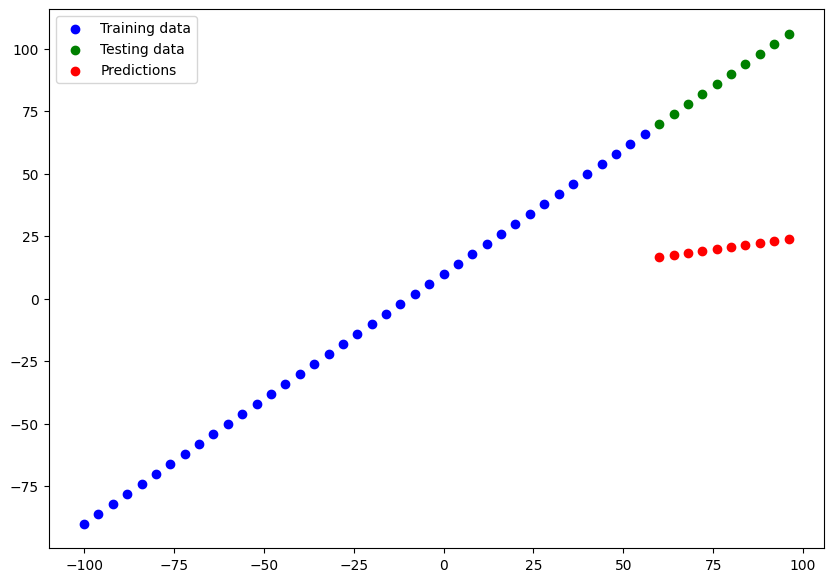

In [ ]:
plot_predictions(predictions=y_preds_3)

In [ ]:
#Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.74279>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4673.3022>)

# Comparing the results of our experiments

In [ ]:
#Lets compare our models result using a pandas DataFrame
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.555531,944.021851
1,model_2,3.056438,12.121346
2,model_3,67.742790,4673.302246


# Tracking your experiments

In [ ]:
#TensorBoard - a component of the TensorFlow library to help tracking modelling experiments
#Weights and Biases - a tool for tracking all kinds of of machine learning experiments

# Saving our models

In [11]:
#Save model
model_2.save("best_model_SavedModel_format")

In [18]:
#Save model HDF5
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading a existing model

In [12]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
#Compare model 2 vs saved one
model_2_preds = model_2.predict(X_test)
model_saved_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == model_saved_preds

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [19]:
loaded_h5 = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [20]:
loaded_h5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_2_preds = model_2.predict(X_test)
model_saved_preds = loaded_h5.predict(X_test)
model_2_preds == model_saved_preds

1/1 [==============================] - 0s 81ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download your files

In [22]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
#Save files from colab to frive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab Notebooks/Tensorflow/
#No funciona porque hay un espacio

cp: target 'Notebooks/Tensorflow/' is not a directory


# A Larger Example

In [25]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [2]:
#Import required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#One hot enconde
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance_one_hot = pd.get_dummies(insurance)

In [7]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
#Create X & Y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [9]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
#Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [12]:
#Build a neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])
#3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13222.9580 - mae: 13222.9580
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12295.0928 - mae: 12295.0928
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12172.4316 - mae: 12172.4316
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12096.9238 - mae: 12096.9238
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11981.9570 - mae: 11981.9570
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 11793.6934 - mae: 11793.6934
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11466.3447 - mae: 11466.3447
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 10954.3457 - mae: 10954.3457
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 10339.0264 - mae: 10339.0264
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 9693.858

In [13]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8916.8555 - mae: 8916.8555


[8916.85546875, 8916.85546875]

In [14]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

# improve our model

In [15]:
#Experiment 1

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])
history = insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13342.9746 - mae: 13342.9746
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13324.8242 - mae: 13324.8242
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13289.8350 - mae: 13289.8350
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13222.7559 - mae: 13222.7559
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13106.8467 - mae: 13106.8467
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 12928.2207 - mae: 12928.2207
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12691.3828 - mae: 12691.3828
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12428.3672 - mae: 12428.3672
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12207.6631 - mae: 12207.6631
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12111.00

In [16]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8632.7090 - mae: 8632.7090


[8632.708984375, 8632.708984375]

Text(0.5, 0, 'epochs')

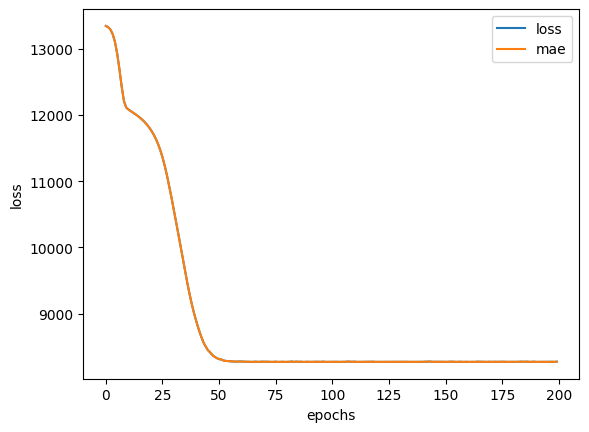

In [17]:
#Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [31]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transfor training and test data with normalization (MinmaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [33]:
#What does our data looks now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [36]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13345.1836 - mae: 13345.1836
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13342.1699 - mae: 13342.1699
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13335.2070 - mae: 13335.2070
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13321.2061 - mae: 13321.2061
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13296.9893 - mae: 13296.9893
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13259.5498 - mae: 13259.5498
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13206.0615 - mae: 13206.0615
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13133.8369 - mae: 13133.8369
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13040.2373 - mae: 13040.2373
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12922.76

In [37]:
#Evaluate our insurance model trained on normalized data
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 1s 6ms/step - loss: 8621.9053 - mae: 8621.9053


[8621.9052734375, 8621.9052734375]